In [36]:
import pandas as pd
from datetime import datetime, date

In [8]:
df = pd.read_csv('raw_dbento_es_1d.csv', parse_dates= True)
df.head()

,ts_event,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol
0,2017-05-21 00:00:00+00:00,35,1,9006,2381.75,2384.00,2381.00,2382.75,14044,ES.v.0
1,2017-05-22 00:00:00+00:00,35,1,9006,2382.75,2394.75,2378.25,2387.25,1119017,ES.v.0
2,2017-05-23 00:00:00+00:00,35,1,9006,2387.25,2399.50,2387.25,2396.75,994869,ES.v.0
3,2017-05-24 00:00:00+00:00,35,1,9006,2396.75,2404.25,2394.75,2403.25,972404,ES.v.0
4,2017-05-25 00:00:00+00:00,35,1,9006,2403.25,2417.75,2402.75,2413.00,1308165,ES.v.0


In [46]:
def find_month(tm):
    parsed_date = datetime.strptime(tm, '%Y-%m-%d %H:%M:%S%z')
    return parsed_date.month

def find_day(tm):
    parsed_date = datetime.strptime(tm, '%Y-%m-%d %H:%M:%S%z')
    return parsed_date.day

def find_date(tm):
    parsed_date = datetime.strptime(tm, '%Y-%m-%d %H:%M:%S%z')
    return parsed_date.date()
    
def month_day(*x):
    m = x[0]
    d = x[1]
    
    return f'{m}-{d}'


In [49]:
df['month'] = df['ts_event'].apply(find_month)
df['doM'] = df['ts_event'].apply(find_day)
df['date'] = df['ts_event'].apply(find_date)
df['m-d'] = df[['month', 'doM']].apply(lambda x: month_day(*x), axis=1)

In [50]:
df.head()

,ts_event,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol,month,doM,date,m-d
0,2017-05-21 00:00:00+00:00,35,1,9006,2381.75,2384.00,2381.00,2382.75,14044,ES.v.0,5,21,2017-05-21,5-21
1,2017-05-22 00:00:00+00:00,35,1,9006,2382.75,2394.75,2378.25,2387.25,1119017,ES.v.0,5,22,2017-05-22,5-22
2,2017-05-23 00:00:00+00:00,35,1,9006,2387.25,2399.50,2387.25,2396.75,994869,ES.v.0,5,23,2017-05-23,5-23
3,2017-05-24 00:00:00+00:00,35,1,9006,2396.75,2404.25,2394.75,2403.25,972404,ES.v.0,5,24,2017-05-24,5-24
4,2017-05-25 00:00:00+00:00,35,1,9006,2403.25,2417.75,2402.75,2413.00,1308165,ES.v.0,5,25,2017-05-25,5-25


In [83]:
month_list = [11, 12, 10]

nov = df.loc[df['month'].isin(month_list)]
nov= nov[['volume', 'm-d', 'doM']]
nov.head(30)

,volume,m-d,doM
114,25809,10-1,1
115,1091730,10-2,2
116,835835,10-3,3
117,940719,10-4,4
118,1085157,10-5,5
119,1128440,10-6,6
120,8075,10-8,8
121,713928,10-9,9
122,1142009,10-10,10
123,803994,10-11,11


In [84]:
nov = nov.groupby('m-d').sum()

In [85]:
nov

,volume,doM
m-d,,
10-1,6434036,5
10-10,8004923,50
10-11,9891666,66
10-12,8081634,60
10-13,7034176,65
...,...,...
12-5,4153719,25
12-6,9070689,36
12-7,7673918,35


<Axes: xlabel='m-d'>

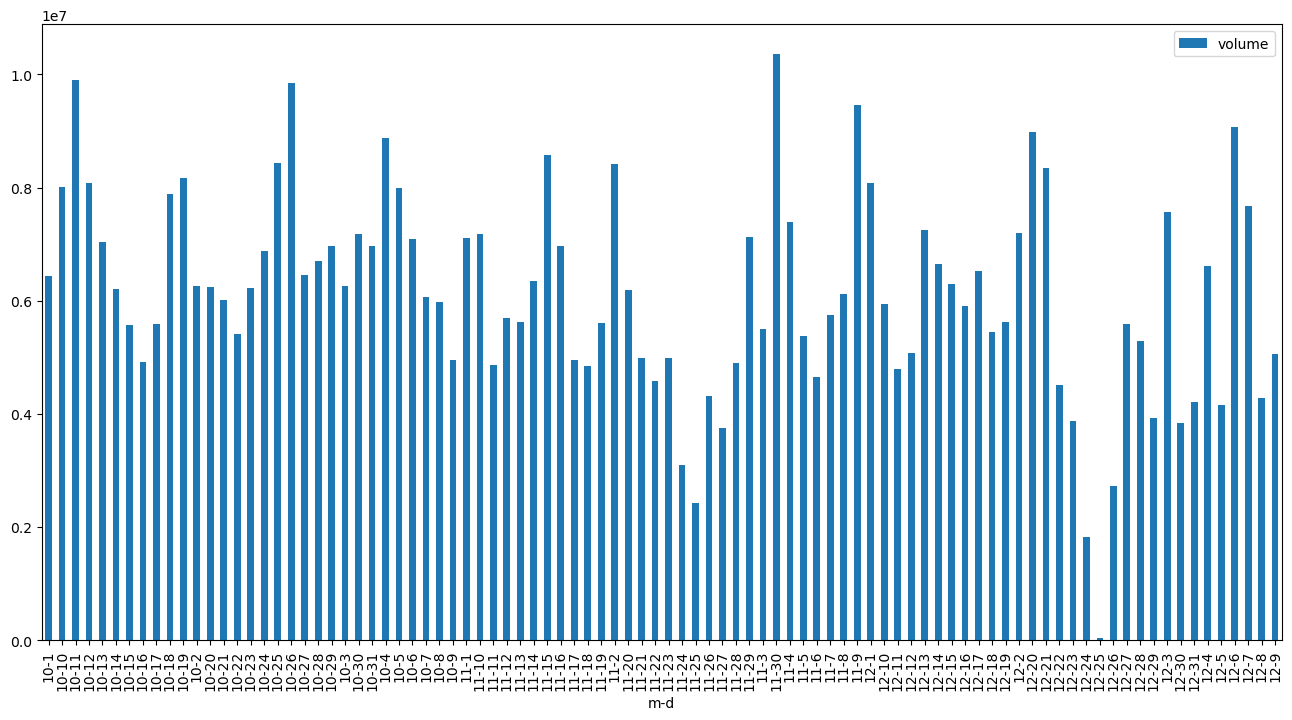

In [79]:
nov.plot(kind= 'bar',figsize=(16, 8))

<Axes: xlabel='m-d'>

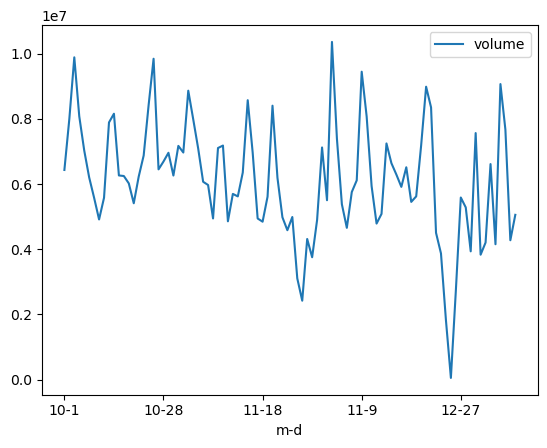

In [63]:
nov.plot()